# ** Heart Disease Prediction Model **

## Using Logistic Regression Model

### Import all required libraries

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection and Processing

In [64]:
dataframe=pd.read_csv('./heart.csv')
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [65]:
dataframe.shape


(1025, 14)

In [66]:
dataframe.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [67]:
dataframe.shape

(1025, 14)

In [68]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [69]:
## checking for missing value
dataframe.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [70]:
dataframe['target'].value_counts()
# 1 means -> Heart disease (Defective heart)
# 0 means -> No heart disease

target
1    526
0    499
Name: count, dtype: int64

In [71]:
dataframe.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [72]:
dataframe.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,28228,413,241,66919,125395,82,228,69426,274,798.5,582,578,1267
1,27567,300,725,67983,126755,71,315,83416,71,299.8,838,195,1115


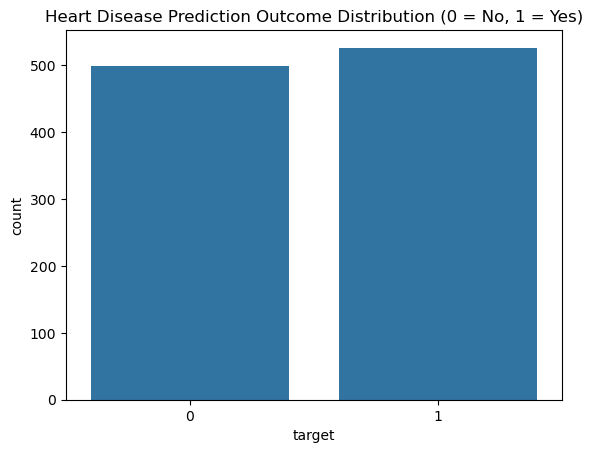

In [73]:
sns.countplot(x='target', data=dataframe)
plt.title("Heart Disease Prediction Outcome Distribution (0 = No, 1 = Yes)")
plt.show()

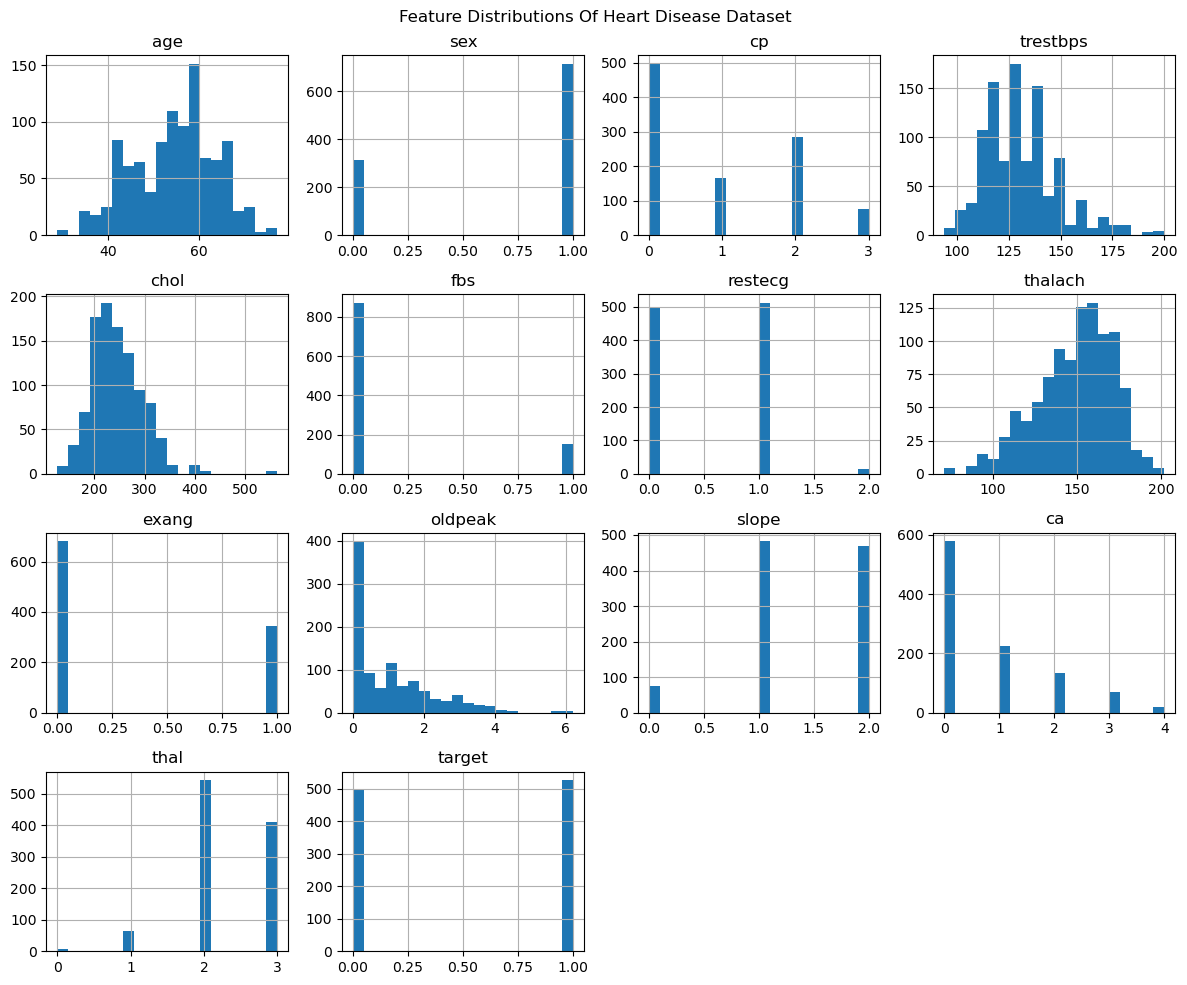

In [94]:
dataframe.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions Of Heart Disease Dataset")
plt.tight_layout()
plt.show()


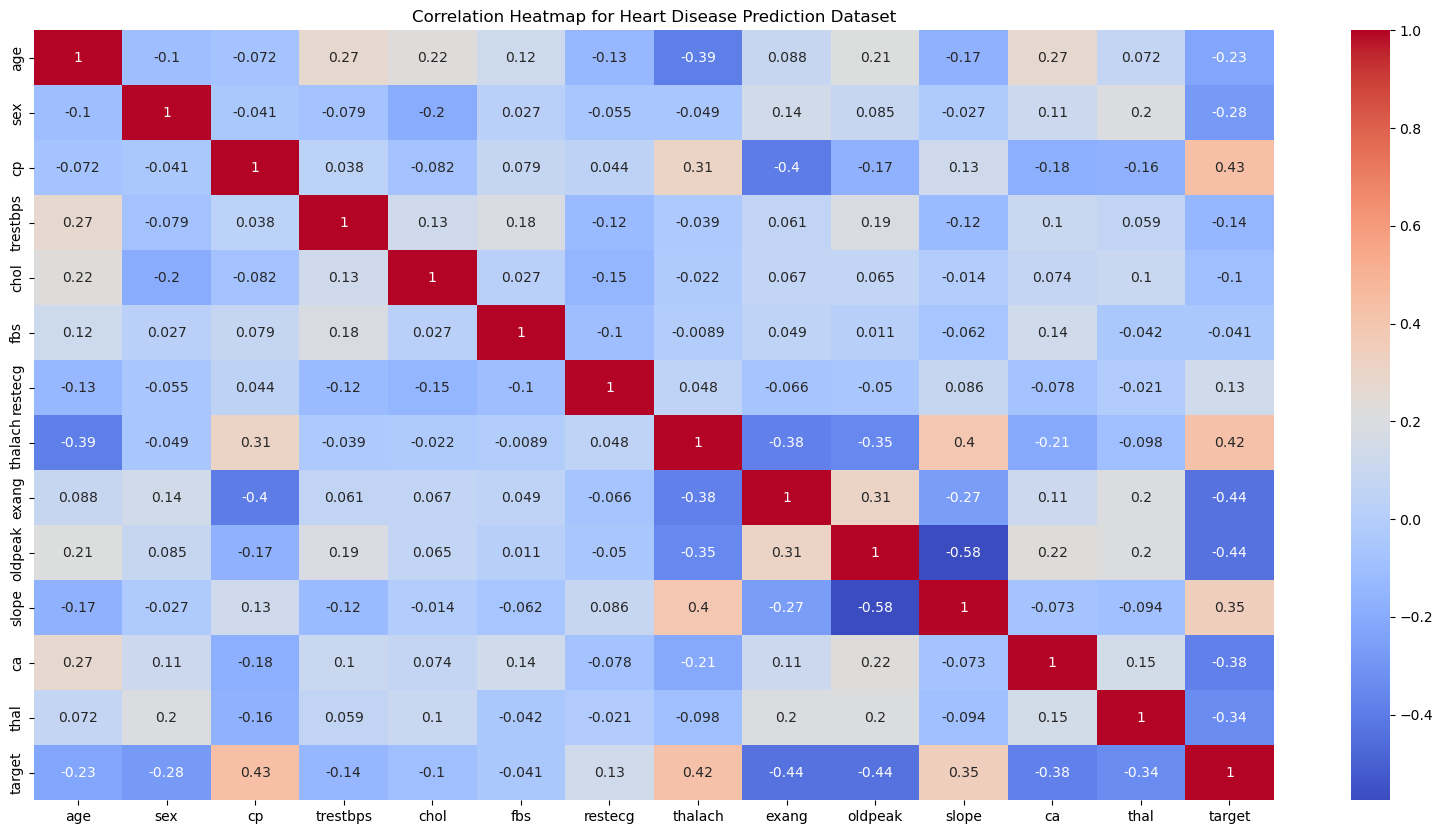

In [75]:
plt.figure(figsize=(20, 10))
sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap for Heart Disease Prediction Dataset")
plt.show()

## Splitting Features and Target


In [76]:
X=dataframe.drop('target',axis=1)
Y=dataframe['target']
# print(X.head())
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


## Standardizing The Data 

In [77]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[-0.26843658  0.66150409 -0.91575542 ...  0.99543334  1.20922066
   1.08985168]
 [-0.15815703  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 [ 1.71659547  0.66150409 -0.91575542 ... -2.24367514 -0.73197147
   1.08985168]
 ...
 [-0.81983438  0.66150409 -0.91575542 ... -0.6241209   0.23862459
  -0.52212231]
 [-0.4889957  -1.51170646 -0.91575542 ...  0.99543334 -0.73197147
  -0.52212231]
 [-0.04787747  0.66150409 -0.91575542 ... -0.6241209   0.23862459
   1.08985168]]


## Splitting Data Into Training Data and Testing Data

In [78]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

print(X.shape,X_test.shape,X_train.shape)
print(Y.shape,Y_test.shape,Y_train.shape)

(1025, 13) (308, 13) (717, 13)
(1025,) (308,) (717,)


##  Model Training 

In [79]:
model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'criterion': ['gini', 'entropy']
        }
    },
    'logistic_reg': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}  # No hyperparameters for basic GaussianNB
    }
}

# Store results
best_models = []
#key value pair 
for name, mp in model_params.items():
    #  use for training cv=> cross validation choose on the bses of accuracy 
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    # fitiing the data on current model
    clf.fit(X_train, Y_train)

    best_models.append({
        'model': name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'final_model': clf.best_estimator_
    })
    print(f"{name} best CV accuracy: {clf.best_score_:.4f}")
    print(f"Best params: {clf.best_params_}\n")


decision_tree best CV accuracy: 0.9707
Best params: {'criterion': 'gini', 'max_depth': None}

logistic_reg best CV accuracy: 0.8480
Best params: {'C': 1, 'solver': 'liblinear'}

knn best CV accuracy: 0.8730
Best params: {'n_neighbors': 3}

naive_bayes best CV accuracy: 0.8396
Best params: {}



## Evaluating the Model

### Accuracy of Trained Data

In [95]:
best_model_info = max(best_models, key=lambda x: x['best_score'])
final_model = best_model_info['final_model']
print(f"The best model has a score of {best_model_info['best_score']} and is {final_model}.")
best_model_info

The best model has a score of 0.9706876456876458 and is DecisionTreeClassifier().


{'model': 'decision_tree',
 'best_score': 0.9706876456876458,
 'best_params': {'criterion': 'gini', 'max_depth': None},
 'final_model': DecisionTreeClassifier()}

In [81]:
X_train_prediction =final_model.predict(X_train)


### Accuracy of Test Data

In [82]:
prediction1=accuracy_score(X_train_prediction,Y_train)

print("Accuracy score for trained data : ",prediction1)

Accuracy score for trained data :  1.0


### Accuracy score for Tested Data 

In [83]:
X_test_predict=final_model.predict(X_test)

In [84]:
prediction2=accuracy_score(X_test_predict,Y_test)
print("Accuracy score for test data : ",prediction2)

Accuracy score for test data :  0.9707792207792207


In [85]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(X_test_predict,Y_test)
print('Confusion matrix : \n',cm)


cr=classification_report(X_test_predict,Y_test)
print('Classification Report  :\n ',cr)

Confusion matrix : 
 [[159   9]
 [  0 140]]
Classification Report  :
                precision    recall  f1-score   support

           0       1.00      0.95      0.97       168
           1       0.94      1.00      0.97       140

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



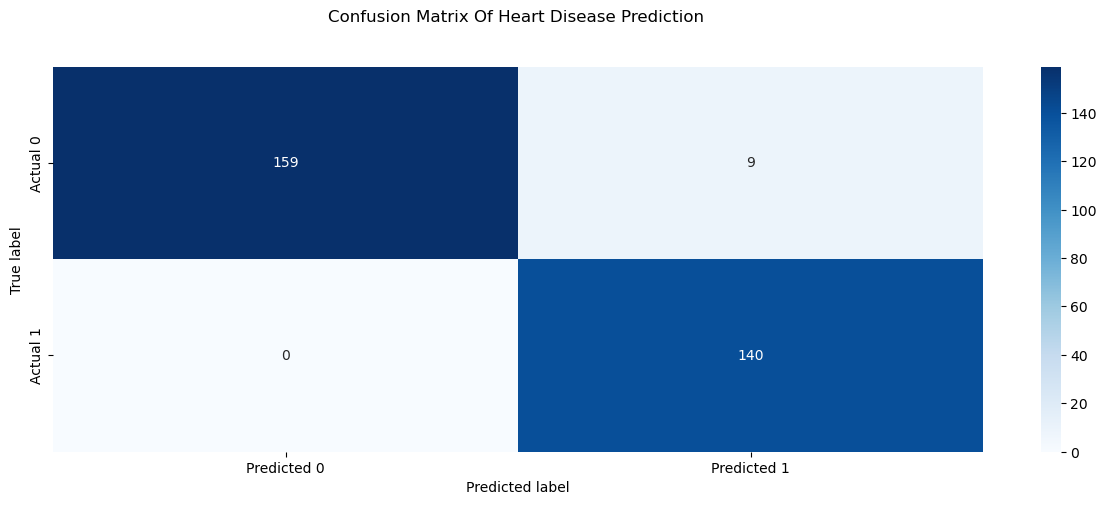

In [86]:
# Create figure
plt.figure(figsize=(15, 5))
# Confusion Matrix
data_cm = cm
sns.heatmap(data_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix Of Heart Disease Prediction \n', pad=20)
plt.xlabel('Predicted label')
plt.ylabel('True label')


plt.show()

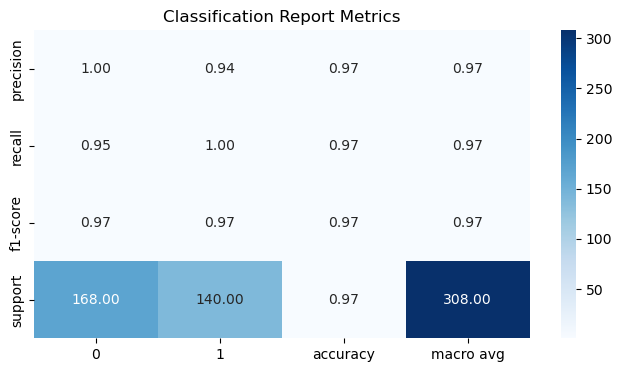

In [87]:
# Generate classification report
report = classification_report(X_test_predict, Y_test, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot classification report
plt.figure(figsize=(8, 4))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f')
plt.title('Classification Report Metrics')
plt.show()



# Building predictive System

### Take any random input 

In [88]:
input_data=(62,0,0,138,294,1,1,106,0,1.9,1,3,2)

arr=np.asarray(input_data)

arr_reshaped=arr.reshape(1,-1)

arr_reshaped


array([[ 62. ,   0. ,   0. , 138. , 294. ,   1. ,   1. , 106. ,   0. ,
          1.9,   1. ,   3. ,   2. ]])

### Standardize the input data

In [89]:
std_data=scaler.transform(arr_reshaped)

d:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


###  Predict the Output for Input Data

In [90]:
prediction3=final_model.predict(std_data)

if (prediction3[0]==1):
    print("The Person has Heart Disease .")
else:
    print("The Person does not have a Heart Disease .")    



The Person does not have a Heart Disease .


In [91]:
import pickle

In [92]:
filename='heartdisease.sav'

pickle.dump(final_model,open(filename,'wb'))
pickle.dump(scaler,open('scaler3.sav','wb'))


In [93]:
loaded_model=pickle.load(open(filename,'rb'))
loaded_model1=pickle.load(open('scaler3.sav','rb'))